**OBJECTIVE:** Run modSAR algorithm on QSAR datasets 

In [1]:
import math
import numpy as np
import pandas as pd

# Import relevant modSAR classes 
from modSAR.network_algorithms import ModSAR
from modSAR.cdk_utils import CDKUtils

%matplotlib inline

# Load Data

Load molecular descriptors on CHRM3 Dataset (Target ID CHEMBL245).

Attention: the algorithm assumes the data is already in the $[0, 1]$ interval, so we must load the normalised features.

In [2]:
X = pd.read_excel('/mnt/data/CHRM3.xlsx', sheet_name='normalised_features')
metadata = pd.read_excel('/mnt/data/CHRM3.xlsx', sheet_name='metadata')
y = metadata['NEW_ACTIVITY_VALUE']
X.index = metadata['PARENT_CMPD_CHEMBLID'].values
X.head()

BCUTw.1l  BCUTw.1h     ...           bpol  topoShape.1
CHEMBL104      0.965261  0.185698     ...       0.037336     0.000401
CHEMBL1082365  0.517799  0.185698     ...       0.068551     0.000401
CHEMBL1083002  0.517799  0.185698     ...       0.079811     0.000401
CHEMBL1083003  0.517799  0.185698     ...       0.056695     0.000401
CHEMBL1083108  0.679612  0.185698     ...       0.056100     0.000401

[5 rows x 94 columns]

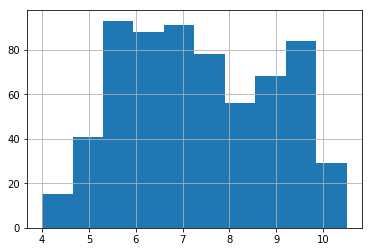

In [3]:
y.hist()

## Calculate Pairwise Similarity

We need to compute the Tanimoto similarity between all compounds before running the algorithm. 

This can be done with the function `calculate_pairwise_tanimoto` from `CDKUtils` class:

In [16]:
cdk_utils = CDKUtils()
# Pass a DataFrame and inform the column that contain SMILES code
similarity_matrix = cdk_utils.calculate_pairwise_tanimoto(metadata, smiles_column='CANONICAL_SMILES')

Starting CDKBridge
Cleaning up JavaGateway


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 |████████████████████████████████████████████████████████████████████████████████████████------------| 88.2% 

 |████████████████████████████████████████████████████████████████████████████████████████------------| 88.4% 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 |████████████████████████████████████████████████████████████████████████████████████████████--------| 92.7% 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 |█████████████████████████████████████████████████████████████████████████████████████████████████---| 97.5% 

 |█████████████████████████████████████████████████████████████████████████████████████████████████---| 97.9% 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Similarity is encoded as a numpy matrix

In [17]:
similarity_matrix

array([[ 0.        ,  0.07692308,  0.07894737, ...,  0.12068966,
         0.        ,  0.11594203],
       [ 0.07692308,  0.        ,  0.6119403 , ...,  0.12345679,
         0.07042254,  0.17045455],
       [ 0.07894737,  0.6119403 ,  0.        , ...,  0.12658228,
         0.07246377,  0.18823529],
       ..., 
       [ 0.12068966,  0.12345679,  0.12658228, ...,  0.        ,
         0.09615385,  0.13513514],
       [ 0.        ,  0.07042254,  0.07246377, ...,  0.09615385,
         0.        ,  0.0952381 ],
       [ 0.11594203,  0.17045455,  0.18823529, ...,  0.13513514,
         0.0952381 ,  0.        ]])

In [7]:
similarity_matrix.min()

0.0

In [8]:
similarity_matrix.max()

1.0

# Run ModSAR algorithm

Create an instance of modSAR algorithm and run `<ModSAR obj>.fit()` function with molecular descriptors, outcome variable and pairwise similarity:

In [18]:
alg = ModSAR()
alg.fit(X, y, similarity_matrix, metadata.CANONICAL_SMILES)

ModSAR(beta=0.03, epsilon=0.01, lam=0.01, solver_name='cplex')
Best Threshold = 0.31 | ACC = 0.749
Threshold: 0.30526315789473685 | k: 0
Num. samples in comm m01: 1
OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 1
SELECTED FEATURES:
[]

Num. samples in comm m09: 104
OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 1
SELECTED FEATURES:
['BCUTw.1l', 'BCUTw.1h', 'BCUTc.1l', 'BCUTp.1l', 'nAtomP', 'nBase', 'nRings7', 'MDEO.22', 'MDEN.22', 'MDEN.33', 'khs.aaO', 'SC.4', 'ATSc4']

None

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 2 f* = BCUTw.1l (loop 1/13) ###########

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 2 f* = BCUTw.1h (loop 2/13) ###########

OplraRegularised(beta=0.03, epsilo

Num. samples in comm m17: 175
OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 1
SELECTED FEATURES:
['BCUTw.1l', 'BCUTw.1h', 'nRings7', 'WTPT.5', 'MDEC.12', 'MDEO.12', 'MDEN.22', 'khs.ssNH', 'khs.aaO', 'khs.aaS', 'VCH.5', 'C1SP1', 'C3SP2', 'topoShape.1']

None

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 2 f* = BCUTw.1l (loop 1/14) ###########

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 2 f* = BCUTw.1h (loop 2/14) ###########

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 2 f* = nRings7 (loop 3/14) ###########

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 2 f* = WTPT.5 (loop 4/14) ###########

OplraR

SELECTED FEATURES:
['BCUTc.1l', 'BCUTp.1h', 'khs.sCl']

None

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 2 f* = BCUTc.1l (loop 1/3) ###########

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 2 f* = BCUTp.1h (loop 2/3) ###########

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 2 f* = khs.sCl (loop 3/3) ###########

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 3 f* = khs.sCl ###########
Num. samples in comm m10: 1
OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 1
SELECTED FEATURES:
[]

Num. samples in comm m11: 6
OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         sol


OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 2 f* = MDEO.22 (loop 8/14) ###########

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 2 f* = MDEN.33 (loop 9/14) ###########

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 2 f* = VC.6 (loop 10/14) ###########

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 2 f* = VCH.5 (loop 11/14) ###########

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 2 f* = C1SP1 (loop 12/14) ###########

OplraRegularised(beta=0.03, epsilon=0.01, exact_number_regions=None, lam=0.01,
         solver_name='cplex')
########## R = 2 f* = C3SP2 (loop 13/14) ###########

OplraRegularised(bet

SELECTED FEATURES:
[]

Communities: Counter({'m17': 175, 'm26': 126, 'm09': 104, 'm20': 68, 'm14': 62, 'm24': 16, 'm39': 12, 'm03': 10, 'm44': 8, 'm11': 6, 'm33': 6, 'm38': 5, 'm35': 5, 'm08': 4, 'm28': 4, 'm21': 3, 'm01': 1, 'm02': 1, 'm04': 1, 'm05': 1, 'm06': 1, 'm07': 1, 'm10': 1, 'm12': 1, 'm13': 1, 'm15': 1, 'm16': 1, 'm18': 1, 'm19': 1, 'm22': 1, 'm23': 1, 'm25': 1, 'm27': 1, 'm29': 1, 'm30': 1, 'm31': 1, 'm32': 1, 'm34': 1, 'm36': 1, 'm37': 1, 'm40': 1, 'm41': 1, 'm42': 1, 'm43': 1, 'm45': 1})


## Graph

We can investigate characteristics of the graph created by modSAR by inspecting the `<modSAR obj>.instance_graph` object:

In [19]:
alg.number_modules

45

In [20]:
alg.threshold

0.30526315789473685

In [21]:
graph = alg.instance_graph

In [22]:
print(graph)

IGRAPH U--- 643 19543 --
+ attr: globalClusteringCoefficient (g), k (g), threshold (g), SMILES (v),
  community (v), degree (v), louvain (v)
+ edges:
  0 --
  1 --   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18  19 524
  2 --   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
524 525 586 593
  3 --   1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
524 525 586 593
  4 --   1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
554
  5 --   1   2   3   4   8   9  11  12  13  14  16  17  18  19 513 524 525 530
536 554 586 593
  6 --   1   2   3   4   8   9  10  11  12  13  14  15  16  17  18  19
  7 --   2   3   4   8  11  12  19
  8 --   1   2   3   4   5   6   7   9  10  11  12  13  14  15  16  17  18  19
524 525
  9 --   1   2   3   4   5   6   8  10  11  12  13  14  15  16  17  18  19 513
524 525 530 536 544 554 586 593
 10 --   1   2   3   4   6   8   9  11  12  13  14  15  16  17  18  19 532 549
554 594
 11 -

Largest modules:

In [28]:
module_sizes = pd.Series(alg.instance_graph.vs['community']).value_counts()
module_sizes.head(15)

m17    175
m26    126
m09    104
m20     68
m14     62
m24     16
m39     12
m03     10
m44      8
m33      6
m11      6
m38      5
m35      5
m28      4
m08      4
dtype: int64

In [29]:
singletons = module_sizes.index[module_sizes == 1]
non_singletons = module_sizes.index[module_sizes != 1]
singletons

Index(['m27', 'm34', 'm23', 'm04', 'm32', 'm18', 'm40', 'm43', 'm02', 'm01', 'm19', 'm42', 'm36', 'm06', 'm10', 'm30', 'm25', 'm41', 'm45', 'm29', 'm12',
       'm15', 'm31', 'm13', 'm05', 'm37', 'm16', 'm07', 'm22'],
      dtype='object')

In [30]:
non_singletons

Index(['m17', 'm26', 'm09', 'm20', 'm14', 'm24', 'm39', 'm03', 'm44', 'm33', 'm11', 'm38', 'm35', 'm28', 'm08', 'm21'], dtype='object')

## Piecewise models

Every module in the graph (m01, m02, m03, etc.) is predicted by a piecewise model that we can uncover from the `<modSAR obj>.get_model_info()` function.

The function returns the linear coefficients and breakpoints used to split the data into regions.

In [31]:
coeff, breakpoints = alg.get_model_info()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)
/mnt/code/modSAR/network_algorithms.py:180: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  coefficients = coefficients.reindex_axis(newColumns, axis=1)
/mnt/code/modSAR/network_algorithms.py:181: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  breakpoints = breakpoints.reindex_axis(['module', 'region', 'breakpoints', 'fStar'], axis=1)


In [32]:
breakpoints.head()

module  region breakpoints    fStar
0    m01       0        None     None
1    m09       0    0.618696   nAtomP
2    m38       0    0.138053  MDEC.12
3    m38       1    0.236215  MDEC.12
4    m14       0    0.403458    ATSc5

In [33]:
coeff.head()

module  region  ATSc3    ...     topoShape.1  tpsaEfficiency.1         B
0    m01       0    NaN    ...             NaN               NaN  5.000000
1    m09       0    NaN    ...             NaN               NaN  4.744439
2    m09       1    NaN    ...             NaN               NaN  5.500000
3    m38       0    NaN    ...             NaN               NaN  5.600000
4    m38       1    NaN    ...             NaN               NaN  7.899225

[5 rows x 42 columns]

# Example: Module m17

Let us take the largest module as an example and look at the piecewise models generated.

Module m17 has one single breakpoint on $MDEO.12 \le 0.174338$ which effectively splits data that falls into this module in two regions.

In [34]:
m17_breakpoints = breakpoints.query('module == "m17"')
m17_breakpoints

module  region breakpoints    fStar
9    m17       0    0.174338  MDEO.12

We can obtain the equations for each module from the `coeff` DataFrame:

In [35]:
m17_coeffs = coeff.query('module == "m17"')
m17_coeffs

module  region  ATSc3    ...     topoShape.1  tpsaEfficiency.1         B
13    m17       0    NaN    ...        0.000000               NaN  7.410000
14    m17       1    NaN    ...       -0.430575               NaN  9.650575

[2 rows x 42 columns]

In [36]:
def print_module_equations(coeffs, module):
    """Helper function to print a clean representation of piecewise equations for informed module"""
    
    coeffs = coeffs.query('module == "%s"' % module)

    def get_linear_equation(row):
        coeffs = ['%+.2f %s' % (val, coeff) for coeff, val in row.iteritems() 
                  if not (math.isnan(val) or float(val) == 0) and coeff != 'B']
        equation_str = ' '.join(coeffs)
        equation_str += " %+.2f" % row['B']    
        return equation_str  
    
    for idx, row in coeffs.groupby(['module', 'region']):
        equation = get_linear_equation(row.drop(columns=['module', 'region']))
        print('Equqations for Module %s | Region %d\n' % idx)
        print("pIC50 = ", equation)
        print()

Equations for Region 0 ($MDEO.12 \le 0.174338$) and Region 1 ($MDEO.12 > 0.174338$) are showed below:

In [37]:
print_module_equations(coeff, 'm17')

Equqations for Module m17 | Region 0

pIC50 =  +0.11 khs.aaS +7.41

Equqations for Module m17 | Region 1

pIC50 =  -1.07 C1SP1 -0.83 MDEC.12 -0.38 MDEN.22 +0.18 khs.aaO +0.48 khs.aaS -0.08 nRings7 -0.43 topoShape.1 +9.65



## Structural Similarity

We can investigate the common core of molecules in this module with RDKit:

In [38]:
from rdkit import Chem
from rdkit.Chem import AllChem
import rdkit.Geometry
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import IPythonConsole 

Obtain SMILES codes of molecules in module m17:

In [39]:
idx_mols_in_m17 = np.where(np.array(alg.instance_graph.vs['community']) == 'm17')[0]
smiles_m17 = metadata.CANONICAL_SMILES.iloc[idx_mols_in_m17]
smiles_m17

87     [Br-].CCCCCCC[N+]12CCC(CC1)[C@H](C2)OC(=O)C(O)...
88     [Br-].O[C@](C1CCCC1)(C(=O)O[C@H]2C[N+]3(CCCOc4...
89     [Br-].O=C(O[C@H]1C[N+]2(CCCOc3ccccc3)CCC1CC2)C...
90     [Br-].OC(C(=O)O[C@H]1C[N+]2(CCCOc3ccccc3)CCC1C...
91     [Br-].OC(C(=O)O[C@H]1C[N+]2(CCCOc3ccccc3)CCC1C...
92     [Br-].OC(C(=O)O[C@H]1C[N+]2(CCCOc3ccccc3)CCC1C...
93     [Br-].OC(C(=O)O[C@H]1C[N+]2(CCCCc3ccccc3)CCC1C...
94     [Br-].CC1(C(=O)O[C@H]2C[N+]3(CCCOc4ccccc4)CCC2...
95     [Br-].O[C@](C(=O)O[C@H]1C[N+]2(CCCOc3ccccc3)CC...
96     [Br-].OC(C(=O)O[C@H]1C[N+]2(Cc3ccccc3)CCC1CC2)...
97     [Br-].O[C@@](C1CCCC1)(C(=O)O[C@H]2C[N+]3(CCCOc...
99     [Br-].O=C(O[C@H]1C[N+]2(CCc3ccccc3)CCC1CC2)C4c...
100    [Br-].CC1(C(=O)O[C@H]2C[N+]3(CCCOc4ccccc4)CCC2...
101    [Br-].C[N+]12CCC(CC1)[C@H](C2)OC(=O)C(O)(c3ccc...
102    [Br-].CC(C(=O)O[C@H]1C[N+]2(CCCOc3ccccc3)CCC1C...
103    [Br-].OC1(C(=O)O[C@H]2C[N+]3(CCCOc4ccccc4)CCC2...
104    [Br-].OC1(C(=O)O[C@H]2C[N+]3(CCc4ccccc4)CCC2CC...
105    [Br-].OC1(C(=O)O[C@H]2C[

### Maximum common core of these molecules:

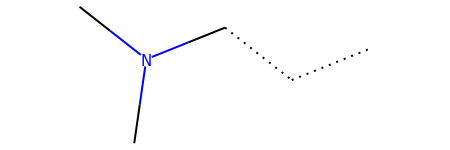

In [40]:
res = rdFMCS.FindMCS([Chem.MolFromSmiles(mol) for mol in smiles_m17])
pattern = Chem.MolFromSmarts(res.smartsString)
pattern

### Most representative structure:

In [41]:
degrees = np.array([alg.instance_graph.vs[i]['degree'] for i in idx_mols_in_m17])
most_representative = smiles_m17.loc[idx_mols_in_m17[np.argmax(degrees)]]
most_representative

'[Br-].O=C(O[C@H]1C[N+]2(CCCc3cccs3)CCC1CC2)N(Cc4cccs4)c5ccccc5'

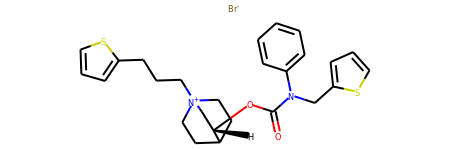

In [42]:
highest_degree_mol = Chem.MolFromSmiles(most_representative)
highest_degree_mol

# Example: Module m26

In [43]:
m26_breakpoints = breakpoints.query('module == "m26"')
m26_breakpoints

module  region breakpoints    fStar
12    m26       0    0.215768  MDEO.12

In [44]:
m26_coeffs = coeff.query('module == "m26"')
m26_coeffs

module  region  ATSc3    ...     topoShape.1  tpsaEfficiency.1         B
18    m26       0    NaN    ...             NaN               NaN  7.656545
19    m26       1    NaN    ...             NaN               NaN  9.874109

[2 rows x 42 columns]

## Structural similarity

In [45]:
idx_mols_in_m26 = np.where(np.array(alg.instance_graph.vs['community']) == 'm26')[0]
smiles_m26 = metadata.CANONICAL_SMILES.iloc[idx_mols_in_m26]
smiles_m26

111                     CCN(Cc1ccncc1)C(=O)C(CO)c2ccccc2
113     CN1[C@@H]2CC[C@H]1C[C@H](C2)OC(c3ccccc3)c4ccccc4
115    [Br-].C[N+]1(C)[C@H]2C[C@@H](C[C@H]1[C@H]3O[C@...
156                  Cl.OC(CCN1CCCCC1)(C2CCCCC2)c3ccccc3
160    Br.CN1[C@@H]2CC[C@H]1C[C@H](C2)OC(=O)C(O)c3ccccc3
161    [Br-].CC(C)[N+]1(C)[C@@H]2CC[C@H]1C[C@H](C2)OC...
165    OC(=O)CCC(=O)O.O=C(O[C@H]1CN2CCC1CC2)N3CCc4ccc...
167           O=C(O[C@H]1CN2CCC1CC2)N(Cc3ccccc3)c4ccccc4
168            O=C(O[C@H]1CN2CCC1CC2)N(c3ccccc3)c4ccccc4
169          O=C(O[C@H]1CN2CCC1CC2)N(CCc3ccccc3)c4ccccc4
170            O=C(O[C@H]1CN2CCC1CC2)N(Cc3cccs3)c4ccccc4
171            O=C(O[C@H]1CN2CCC1CC2)N(Cc3ccsc3)c4ccccc4
172                 CCCN(C(=O)O[C@H]1CN2CCC1CC2)c3ccccc3
173                CCCCN(C(=O)O[C@H]1CN2CCC1CC2)c3ccccc3
174               CCCCCN(C(=O)O[C@H]1CN2CCC1CC2)c3ccccc3
175               CC(C)N(C(=O)O[C@H]1CN2CCC1CC2)c3ccccc3
176           O=C(O[C@H]1CN2CCC1CC2)N(Cc3ccccc3)Cc4cccs4
177            O=C(O[C@H]1CN2CC

### Maximum common core of these molecules:

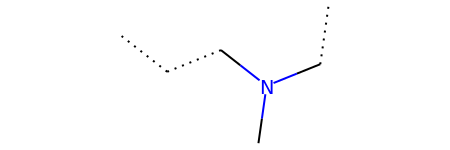

In [46]:
res = rdFMCS.FindMCS([Chem.MolFromSmiles(mol) for mol in smiles_m26])
pattern = Chem.MolFromSmarts(res.smartsString)
pattern

### Most representative structure

In [47]:
degrees = np.array([alg.instance_graph.vs[i]['degree'] for i in idx_mols_in_m26])
most_representative = smiles_m26.loc[idx_mols_in_m26[np.argmax(degrees)]]
most_representative

'[Br-].O=C(O[C@H]1C[N+]2(CCOc3ccccc3)CCC1CC2)N(Cc4ccccc4)c5ccccc5'

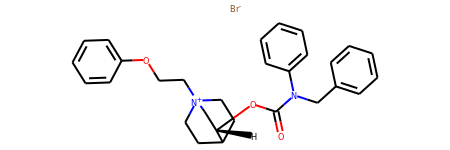

In [48]:
highest_degree_mol = Chem.MolFromSmiles(most_representative)
highest_degree_mol

In [49]:
print_module_equations(coeff, 'm26')

Equqations for Module m26 | Region 0

pIC50 =  -1.60 BCUTc.1l +0.28 C1SP1 +0.42 VCH.5 -0.24 khs.dO +0.84 nBase -0.68 nRings7 +7.66

Equqations for Module m26 | Region 1

pIC50 =  -0.85 C1SP1 +2.35 C1SP2 -0.66 ECCEN -0.51 MDEC.12 -0.46 khs.aaO -2.48 khs.sssN -1.03 nRings7 +9.87

